# Big Red Soundscape
Notebook Playground 1  
_by Ahmed Sultan, for Cornell Data Journal_

In [1]:
import json
import math

import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# update access keys here for Spotify API here :) 
client_id = '860ada55cc094dbf906250fe2d4caf48'
client_secret = '75fe4137c4a54541800d19b74dc706fb'

# sp is how we interface with the Spotify API
# read the docs here: https://spotipy.readthedocs.io/en/2.22.1/
sp = spotipy.Spotify(client_credentials_manager=\
                     SpotifyClientCredentials(client_id, client_secret))

In [4]:
# let's use this random guy
# https://open.spotify.com/user/mittfard?si=d2a18228fafa474b

# what information do we get from a user profile?
aks_info = sp.user('carlatude')

In [5]:
print(aks_info) # nothing super useful L

{'display_name': 'Carly Hu', 'external_urls': {'spotify': 'https://open.spotify.com/user/carlatude'}, 'followers': {'href': None, 'total': 47}, 'href': 'https://api.spotify.com/v1/users/carlatude', 'id': 'carlatude', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab6775700000ee8520ea30c732693606f95d93ae', 'width': None}], 'type': 'user', 'uri': 'spotify:user:carlatude'}


In [10]:
# now let's look @ playlists :D
aks_playlists = sp.user_playlists('carlatude', limit=50)

In [11]:
print(len(aks_playlists['items'])) 

# our limit was 50 ... prolly more playlists to look @
# (i.e. this guy has no life)

29


In [12]:
# what does a playlist item look like in this query ?
print(json.dumps(obj=aks_playlists['items'][0], indent=2))

# hint: using the indent feature makes json output more readable
# wish i knew this sooner!!!!!!! (I Yearn For Death)

{
  "collaborative": false,
  "description": "",
  "external_urls": {
    "spotify": "https://open.spotify.com/playlist/0AberywlM7KTsCBRAs1Hs0"
  },
  "href": "https://api.spotify.com/v1/playlists/0AberywlM7KTsCBRAs1Hs0",
  "id": "0AberywlM7KTsCBRAs1Hs0",
  "images": [
    {
      "height": null,
      "url": "https://i.scdn.co/image/ab67706c0000bebba50e6f54041d4998e42c74bc",
      "width": null
    }
  ],
  "name": "spring 23",
  "owner": {
    "display_name": "Carly Hu",
    "external_urls": {
      "spotify": "https://open.spotify.com/user/carlatude"
    },
    "href": "https://api.spotify.com/v1/users/carlatude",
    "id": "carlatude",
    "type": "user",
    "uri": "spotify:user:carlatude"
  },
  "primary_color": null,
  "public": true,
  "snapshot_id": "NjAsYzhmZGRmYTAwYmFiODBlMWNlYTE3ZGRkZmE2MWE0NjEzYzQyNDgxNA==",
  "tracks": {
    "href": "https://api.spotify.com/v1/playlists/0AberywlM7KTsCBRAs1Hs0/tracks",
    "total": 46
  },
  "type": "playlist",
  "uri": "spotify:playlist:0

In [13]:
# Come Get Litty ... let's look @ the songs in this playlist
results = sp.playlist(aks_playlists['items'][0]['id'])

In [14]:
# one song (first) from results output
print(json.dumps(obj=results['tracks']['items'][0]))

{"added_at": "2023-01-24T05:38:04Z", "added_by": {"external_urls": {"spotify": "https://open.spotify.com/user/carlatude"}, "href": "https://api.spotify.com/v1/users/carlatude", "id": "carlatude", "type": "user", "uri": "spotify:user:carlatude"}, "is_local": false, "primary_color": null, "track": {"album": {"album_group": "single", "album_type": "single", "artists": [{"external_urls": {"spotify": "https://open.spotify.com/artist/1U1el3k54VvEUzo3ybLPlM"}, "href": "https://api.spotify.com/v1/artists/1U1el3k54VvEUzo3ybLPlM", "id": "1U1el3k54VvEUzo3ybLPlM", "name": "Kali Uchis", "type": "artist", "uri": "spotify:artist:1U1el3k54VvEUzo3ybLPlM"}], "available_markets": ["AD", "AE", "AG", "AL", "AM", "AO", "AR", "AT", "AU", "AZ", "BA", "BB", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BN", "BO", "BR", "BS", "BT", "BW", "BZ", "CA", "CD", "CG", "CH", "CI", "CL", "CM", "CO", "CR", "CV", "CW", "CY", "CZ", "DE", "DJ", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "ES", "ET", "FI", "FJ", "FM", "FR", "GA",

In [15]:
# what if we want to know more about this song?
# Thank You For Asking........ we can get track details
sample_track = sp.track(results['tracks']['items'][0]['track']['id'])

In [16]:
print(json.dumps(obj=sample_track))

# we get album information, but we also get popularity, duration

{"album": {"album_group": "single", "album_type": "single", "artists": [{"external_urls": {"spotify": "https://open.spotify.com/artist/1U1el3k54VvEUzo3ybLPlM"}, "href": "https://api.spotify.com/v1/artists/1U1el3k54VvEUzo3ybLPlM", "id": "1U1el3k54VvEUzo3ybLPlM", "name": "Kali Uchis", "type": "artist", "uri": "spotify:artist:1U1el3k54VvEUzo3ybLPlM"}], "available_markets": ["AD", "AE", "AG", "AL", "AM", "AO", "AR", "AT", "AU", "AZ", "BA", "BB", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BN", "BO", "BR", "BS", "BT", "BW", "BZ", "CA", "CD", "CG", "CH", "CI", "CL", "CM", "CO", "CR", "CV", "CW", "CY", "CZ", "DE", "DJ", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "ES", "FI", "FJ", "FM", "FR", "GA", "GB", "GD", "GE", "GH", "GM", "GN", "GQ", "GR", "GT", "GW", "GY", "HK", "HN", "HR", "HT", "HU", "ID", "IE", "IL", "IN", "IQ", "IS", "IT", "JM", "JO", "JP", "KE", "KG", "KH", "KI", "KM", "KN", "KR", "KW", "KZ", "LA", "LB", "LC", "LI", "LK", "LR", "LS", "LT", "LU", "LV", "LY", "MA", "MC", "MD", "ME", "M

In [47]:
# how much for a feature
sample_track_features = sp.audio_features(results['tracks']['items'][0]['track']['id'])

# get track id
i = 0
tracks = []

for i in range(results['tracks']['total']):
    tracks.append(results['tracks']['items'][i]['track']['id'])
    i = i + 1

print(tracks)

In [48]:
print(json.dumps(obj=sample_track_features, indent=2))

# That's crazy

[
  {
    "danceability": 0.467,
    "energy": 0.624,
    "key": 10,
    "loudness": -8.511,
    "mode": 0,
    "speechiness": 0.0508,
    "acousticness": 0.143,
    "instrumentalness": 0.000899,
    "liveness": 0.145,
    "valence": 0.31,
    "tempo": 141.889,
    "type": "audio_features",
    "id": "6BQrmjAgPfPTwILoFEK3Hd",
    "uri": "spotify:track:6BQrmjAgPfPTwILoFEK3Hd",
    "track_href": "https://api.spotify.com/v1/tracks/6BQrmjAgPfPTwILoFEK3Hd",
    "analysis_url": "https://api.spotify.com/v1/audio-analysis/6BQrmjAgPfPTwILoFEK3Hd",
    "duration_ms": 225947,
    "time_signature": 4
  }
]


In [14]:
# let's aggregate the data from a whole playlist now
# lowkey dana did it better than i did ... here's her method (adapted)

# hold track ids here
ids = []

# collect track ids
for r in results['tracks']['items']:
    ids.append(r['track']['id'])
    
song_info = {'id': [], 'title': [], 'artist': [], 'album': [], 
             'explicit': [], 'popularity': []}
    
for i in ids:
    # get song's metadata
    meta = sp.track(i)
    
    # append id to id column
    song_info['id'].append(i)
    
    # append song title to title column
    song_info['title'].append(meta['name'])
    
    # append artists to artist column
    s = ', '
    artists = s.join([name['name'] for name \
                     in meta['artists']])
    song_info['artist'].append(artists)
    
    # append album title to album column
    song_info['album'].append(meta['album']['name'])
    
    # append explicit info to explicit column
    song_info['explicit'].append(meta['explicit'])
    
    # append popularity info to popularity column
    song_info['popularity'].append(meta['popularity'])
    
# convert song_info dictionary -> Pandas DataFrame
song_info_df = pd.DataFrame.from_dict(song_info)

# look up audio features data for each entry in song_info_df
features_df = pd.DataFrame.from_dict(sp.audio_features(song_info_df['id']))

df = song_info_df.merge(features_df)

In [15]:
# Wow This Guy Is A Loser
df

,id,title,artist,album,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,2h3Lz1AKD2AT8yzU6ySo61,Learning,COIN,Uncanny Valley,False,37,0.248,0.2330,10,-13.125,...,0.056600,0.4140,0.1700,178.650,audio_features,spotify:track:2h3Lz1AKD2AT8yzU6ySo61,https://api.spotify.com/v1/tracks/2h3Lz1AKD2AT...,https://api.spotify.com/v1/audio-analysis/2h3L...,83945,4
1,51RN0kzWd7xeR4th5HsEtW,IGOR'S THEME,"Tyler, The Creator",IGOR,False,71,0.467,0.6720,10,-7.371,...,0.243000,0.6070,0.0648,163.100,audio_features,spotify:track:51RN0kzWd7xeR4th5HsEtW,https://api.spotify.com/v1/tracks/51RN0kzWd7xe...,https://api.spotify.com/v1/audio-analysis/51RN...,200693,4
2,1BpKJw4RZxaFB88NE5uxXf,ILoveUIHateU,Playboi Carti,Whole Lotta Red,True,79,0.684,0.6930,4,-6.651,...,0.000000,0.5060,0.1080,134.988,audio_features,spotify:track:1BpKJw4RZxaFB88NE5uxXf,https://api.spotify.com/v1/tracks/1BpKJw4RZxaF...,https://api.spotify.com/v1/audio-analysis/1BpK...,135122,4
3,0X5mtNbqxbiTYkwj0CQc2f,Crash My Car,COIN,Dreamland,False,19,0.244,0.6450,5,-5.863,...,0.005740,0.3010,0.5290,183.577,audio_features,spotify:track:0X5mtNbqxbiTYkwj0CQc2f,https://api.spotify.com/v1/tracks/0X5mtNbqxbiT...,https://api.spotify.com/v1/audio-analysis/0X5m...,188307,5
4,3L8sfv4Fb8pONhiMA4nAKJ,Aberdeen,Cage The Elephant,Thank You Happy Birthday,False,54,0.154,0.9720,7,-3.624,...,0.225000,0.3680,0.2250,205.478,audio_features,spotify:track:3L8sfv4Fb8pONhiMA4nAKJ,https://api.spotify.com/v1/tracks/3L8sfv4Fb8pO...,https://api.spotify.com/v1/audio-analysis/3L8s...,192920,4
5,3r1qdSsvJEwiMKHeCWapMM,Worth It,beabadoobee,Fake It Flowers,True,53,0.576,0.7510,2,-5.256,...,0.000459,0.0501,0.3800,103.009,audio_features,spotify:track:3r1qdSsvJEwiMKHeCWapMM,https://api.spotify.com/v1/tracks/3r1qdSsvJEwi...,https://api.spotify.com/v1/audio-analysis/3r1q...,194173,4
6,6F79dRa51RNveaRZVZ3xdk,You and Your Friends,Peach Pit,You and Your Friends (Deluxe),False,34,0.552,0.6710,9,-7.631,...,0.004320,0.0696,0.2280,104.053,audio_features,spotify:track:6F79dRa51RNveaRZVZ3xdk,https://api.spotify.com/v1/tracks/6F79dRa51RNv...,https://api.spotify.com/v1/audio-analysis/6F79...,236653,4
7,25Syi9wnfn6ZGAmiOBypPq,Motion Sickness,Phoebe Bridgers,Stranger in the Alps (Deluxe Edition),False,65,0.651,0.5460,1,-9.021,...,0.043700,0.0842,0.6230,107.021,audio_features,spotify:track:25Syi9wnfn6ZGAmiOBypPq,https://api.spotify.com/v1/tracks/25Syi9wnfn6Z...,https://api.spotify.com/v1/audio-analysis/25Sy...,229760,4
8,2MCcUgZVe1RH8beGoeA4bE,Dramamine,Wallice,Off the Rails,False,0,0.607,0.7510,11,-5.577,...,0.002040,0.2330,0.5830,124.169,audio_features,spotify:track:2MCcUgZVe1RH8beGoeA4bE,https://api.spotify.com/v1/tracks/2MCcUgZVe1RH...,https://api.spotify.com/v1/audio-analysis/2MCc...,175124,4
9,7sUTbNjYpJkUhICiLEoYdf,Hey Michael,"Wallice, marinelli",Hey Michael,True,0,0.759,0.6360,4,-6.387,...,0.000117,0.6430,0.9210,120.019,audio_features,spotify:track:7sUTbNjYpJkUhICiLEoYdf,https://api.spotify.com/v1/tracks/7sUTbNjYpJkU...,https://api.spotify.com/v1/audio-analysis/7sUT...,179852,4


In [16]:
# we can also make a polar plot (thank you again dana...)
from sklearn.preprocessing import MinMaxScaler

pull_features = features_df[['danceability', 'energy', 'loudness',
                            'speechiness','acousticness', 'instrumentalness']]

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# MinMaxScaler takes a set of data and scales it based on range
# this will be really useful :) 
mms = MinMaxScaler()

# fit the scaler on the data, replace data with useful values
pull_features.loc[:] = mms.fit_transform(pull_features.loc[:])

# I love ignoring warnings

/var/folders/0g/3z5xrttj3457ptrm4n_dts1w0000gn/T/ipykernel_98274/659216500.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pull_features.loc[:] = mms.fit_transform(pull_features.loc[:])


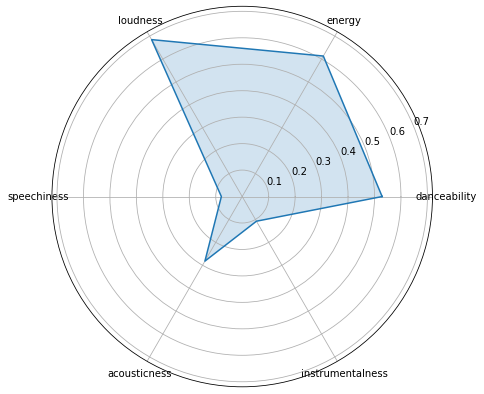

In [17]:
# "its plotting time" - me

plot = plt.figure(figsize=(7,7))

categories = list(pull_features.columns)
N = len(categories)

means = list(pull_features.mean())
angles = [n / float(N) * 2 * math.pi for n in range(N)]

means+=means[:1]
angles+=angles[:1]

plt.polar(angles, means)
plt.fill_between(angles, means, alpha=0.2)

plt.xticks(angles[:-1],categories, size=10)
plt.show()